# Unfolding Exercise (step function)

In [1]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from bb.tools.hist_tools_modified import hist
from bb.tools.bayesian_blocks_modified import bayesian_blocks
from root_pandas import read_root
import bb.tools.unfolding as uf

Welcome to ROOTaaS 6.06/06


In [2]:
np.random.seed(100)
a = np.random.uniform(50,250,9000)
b = np.random.uniform(100,140,400)
c = np.random.uniform(160,200,400)
uni = np.concatenate([a,b,c])

In [3]:
df_evts = pd.DataFrame({'gen':uni})
df_evts['reco'] = rnd.normal(df_evts['gen'], df_evts['gen']*0.05)
xlims = (min(df_evts['reco'])-0.2, max(df_evts['reco'])+0.2)

/usr/local/lib/python2.7/site-packages/pandas/indexes/range.py:439: RuntimeWarning: tp_compare didn't return -1 or -2 for exception
  return max(0, -(-(self._stop - self._start) // self._step))


(array([ 45.12946708,  47.12966507,  45.5045042 ,  43.75433096,
         45.62951658,  48.25477643,  51.13006104,  56.38058076,
         54.88043227,  58.88082824,  52.25517241,  47.37968982,
         44.62941758,  43.75433096,  59.00584061,  55.38048176,
         52.38018478,  58.25576637,  48.62981356,  43.50430622,
         45.12946708,  41.87914535,  42.1291701 ,  47.62971456,  46.5046032 ]),
 array([  50.00292371,   58.00213184,   66.00133998,   74.00054811,
          81.99975624,   89.99896437,   97.9981725 ,  105.99738063,
         113.99658876,  121.99579689,  129.99500502,  137.99421315,
         145.99342128,  153.99262941,  161.99183754,  169.99104567,
         177.9902538 ,  185.98946193,  193.98867007,  201.9878782 ,
         209.98708633,  217.98629446,  225.98550259,  233.98471072,
         241.98391885,  249.98312698]),
 <Container object of 3 artists>)

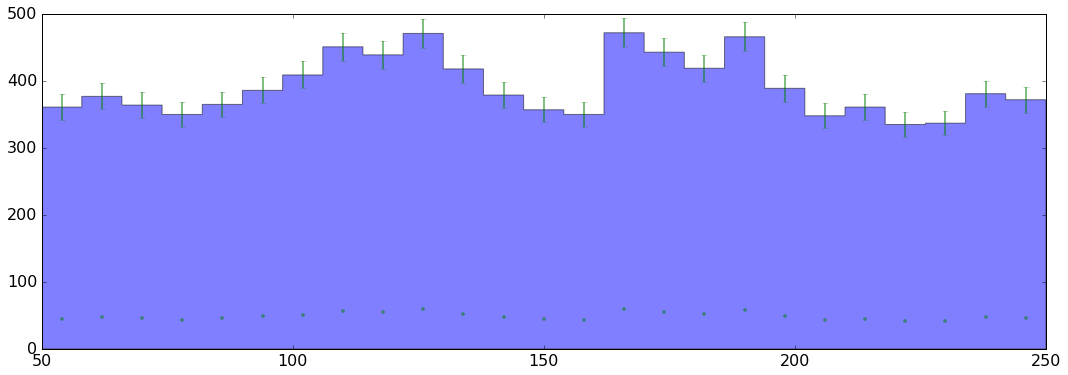

In [101]:
hist(df_evts['gen'], 25, alpha=0.5, histtype='stepfilled', label='gen', scale='binwidth')

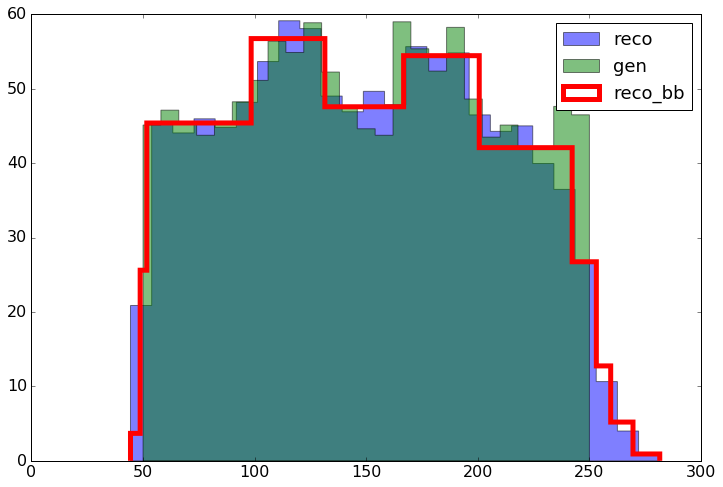

In [4]:
hist(df_evts['reco'], 25, alpha=0.5, histtype='stepfilled', label='reco', scale='binwidth')
hist(df_evts.reco.values, p0=0.05, bins='blocks', linewidth=5, histtype='step', scale='binwidth', label='reco_bb')
plt.legend()

In [40]:
bb_bin = bayesian_blocks(df_evts['reco'], p0=0.05)
bb_bin[0] -= 0.1
bb_bin[-1] += 0.1

In [41]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40,80, bb_bin]

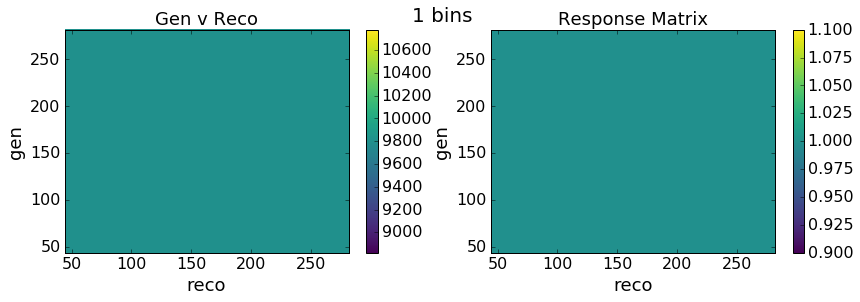

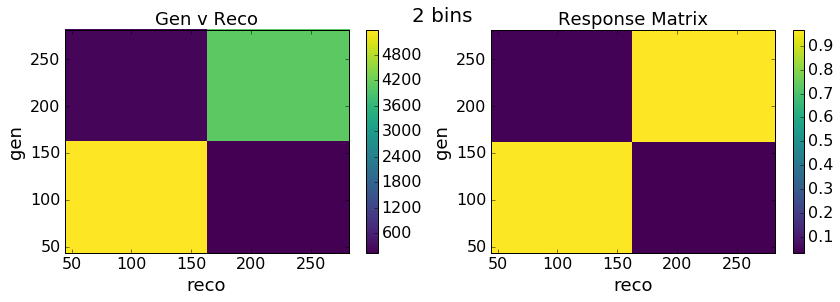

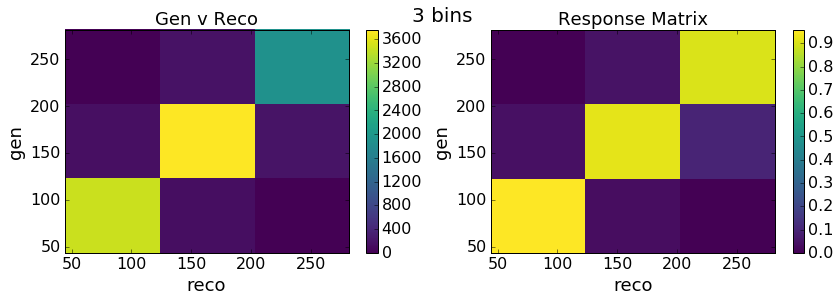

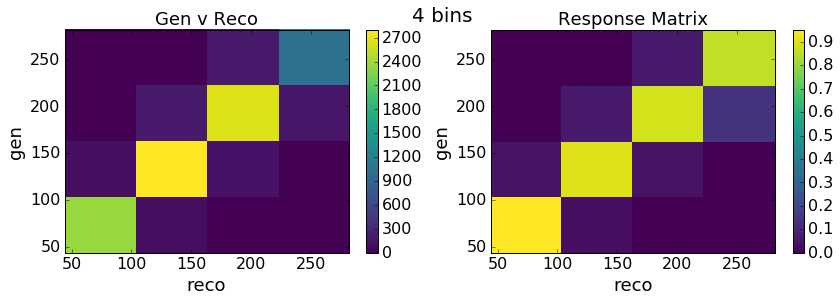

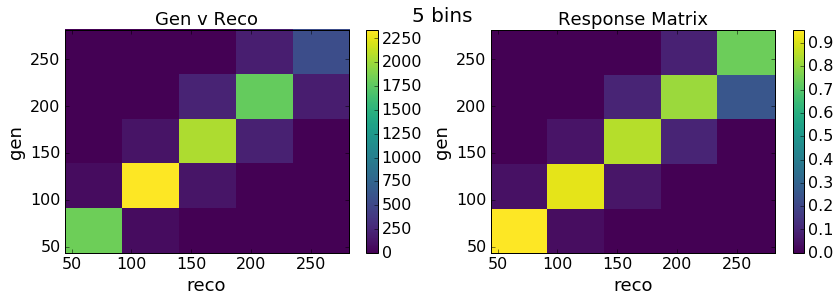

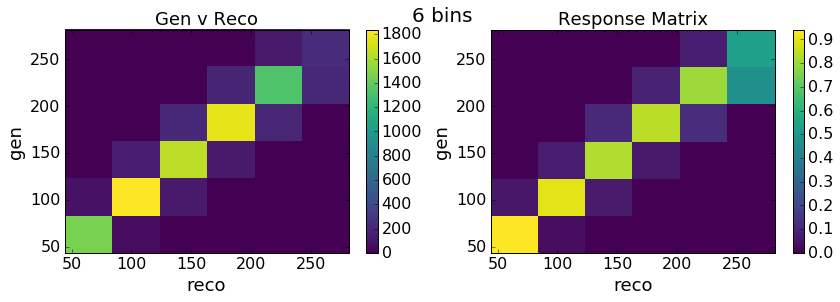

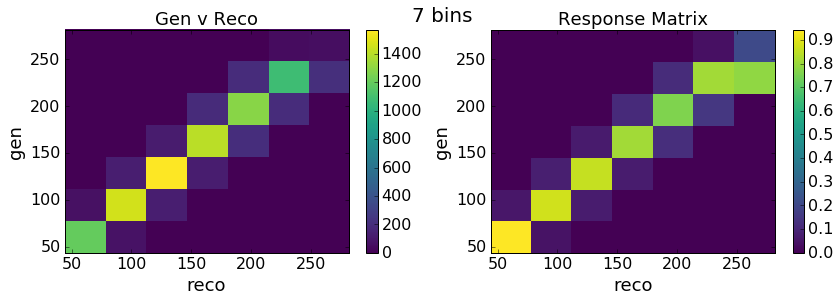

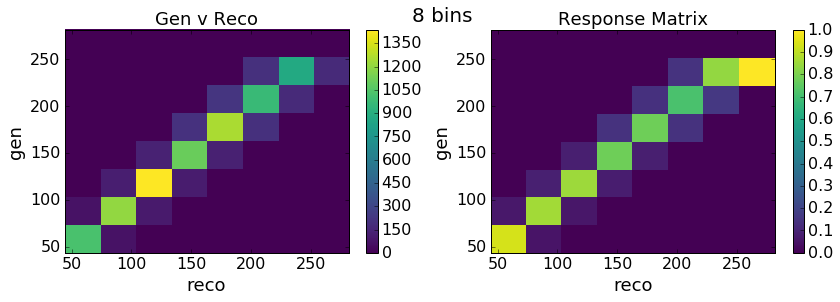

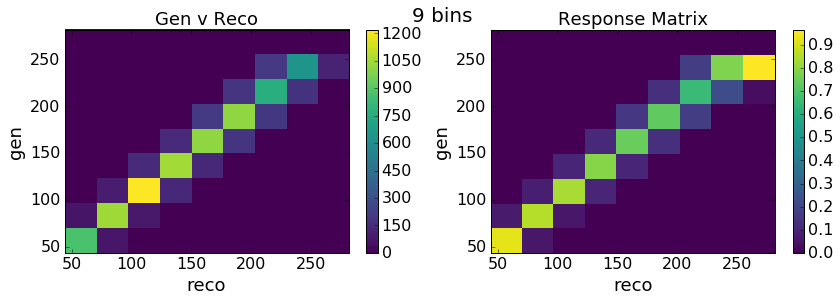

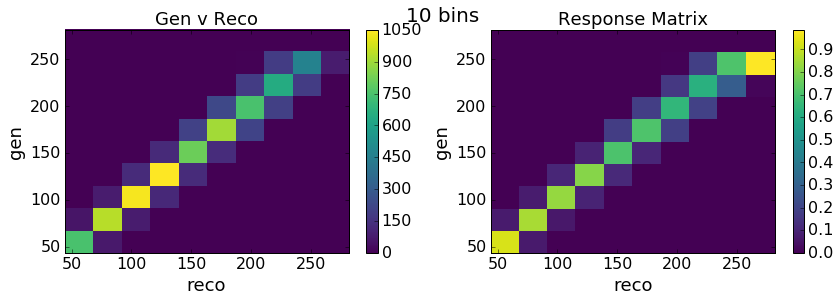

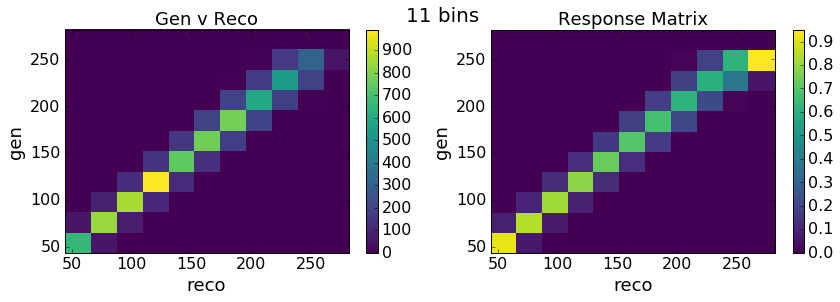

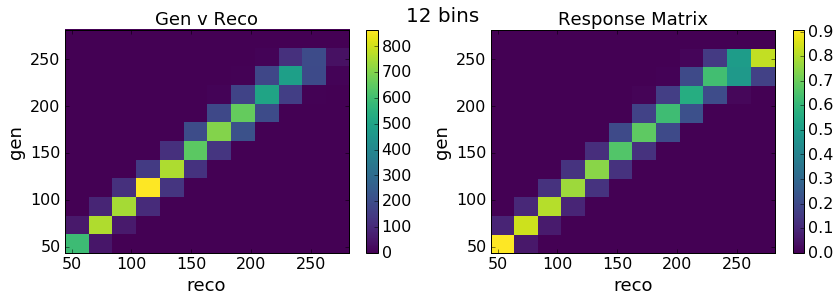

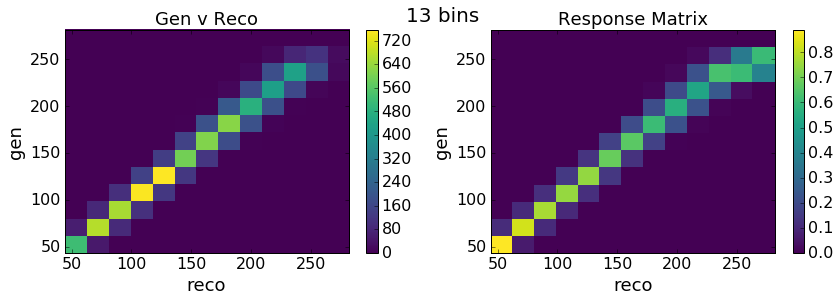

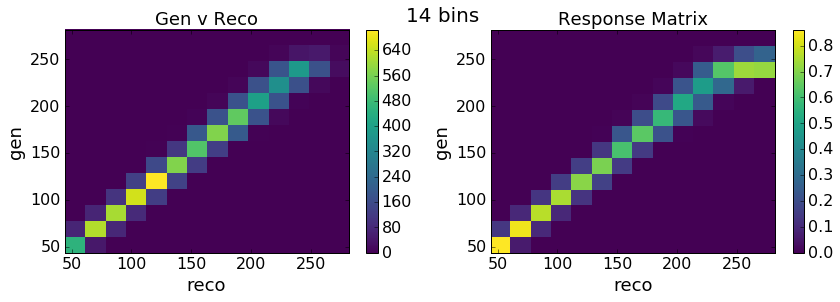

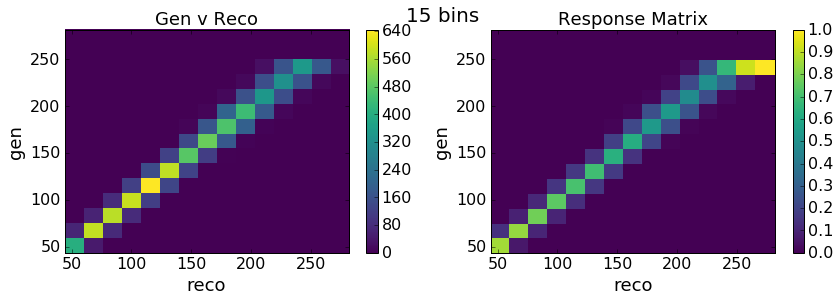

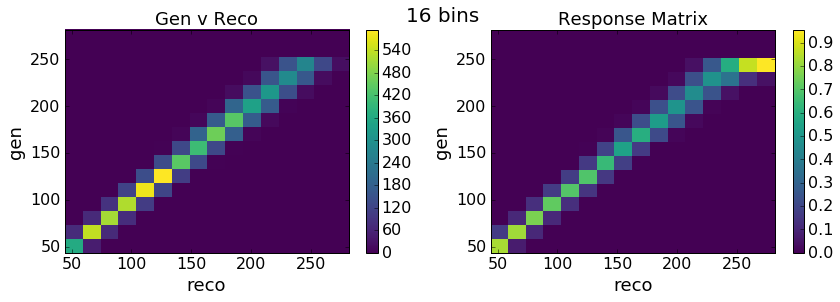

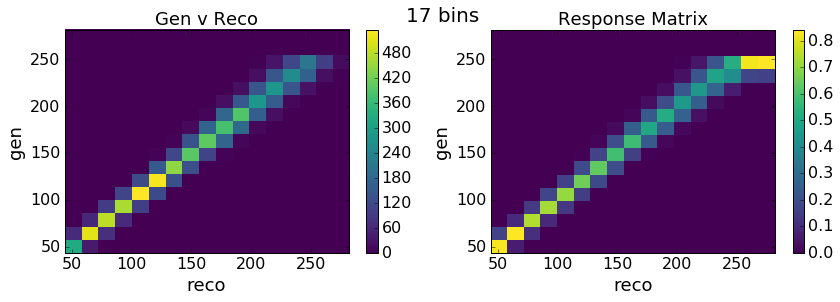

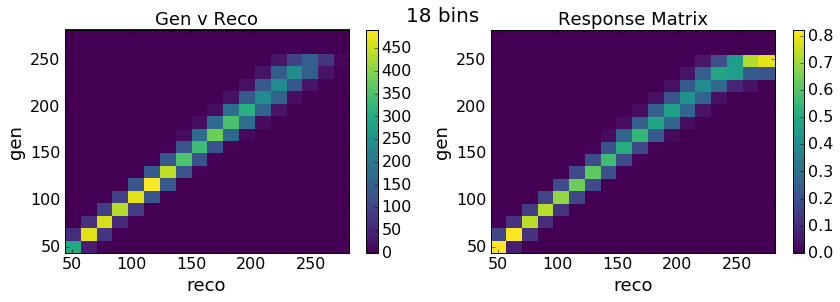

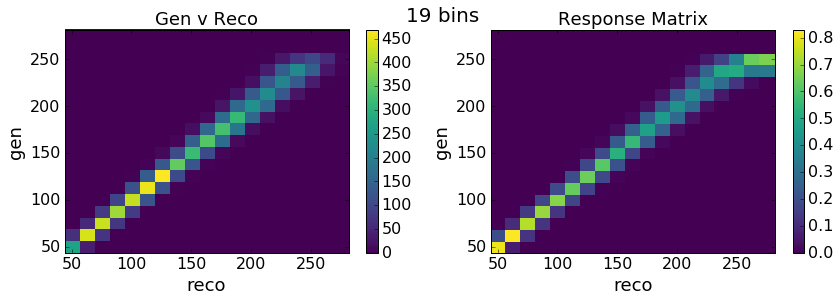

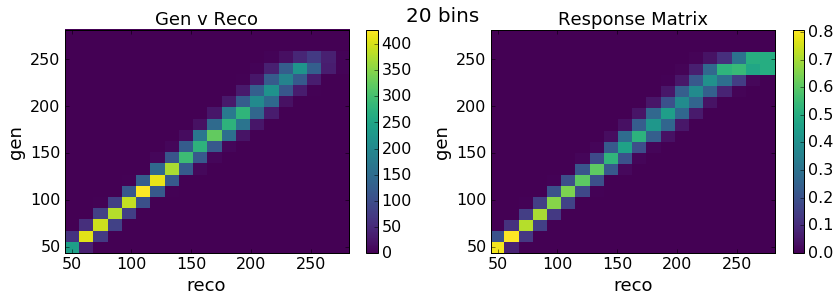

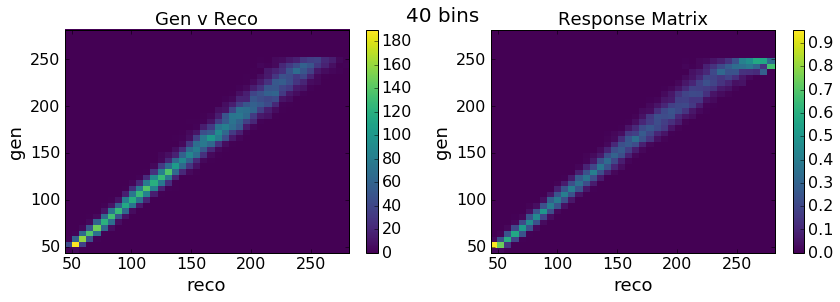

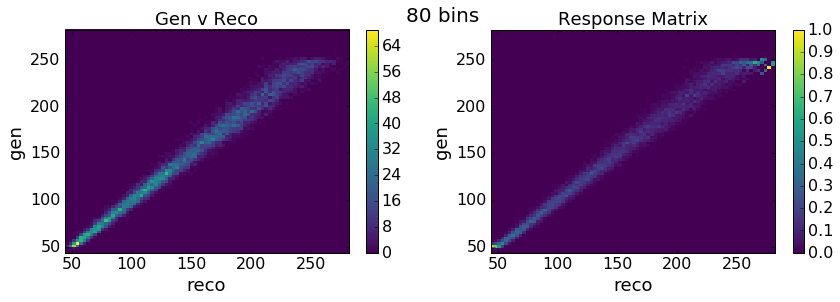

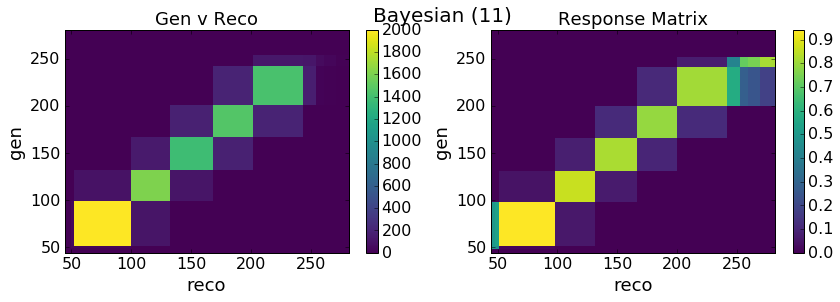

In [85]:
plt.rcParams['figure.figsize'] = (14,4)
gran_vals = []
diag_vals = []
mult_vals = []
add_vals = []

for b in bins:
    bc = bex = bey = {}
    re = uf.calc_response_matrix(df_evts, b, xlims)
    uf.plot_events_and_response(df_evts, b, re, xlims)
    
    gran = uf.calc_granularity(re)
    diag = uf.calc_diagonality(re)
    gran_vals.append(gran)
    diag_vals.append(diag)
    mult_vals.append(gran*diag)
    add_vals.append(gran+diag)
plt.rcParams['figure.figsize'] = (12,8)
bin_labels = bins[:]
bin_labels[-1] = len(bin_labels[-1])-1

In [8]:
df = pd.DataFrame({'gran':gran_vals, 'diag':diag_vals, 'mult':mult_vals, 'add':add_vals},index=bin_labels)

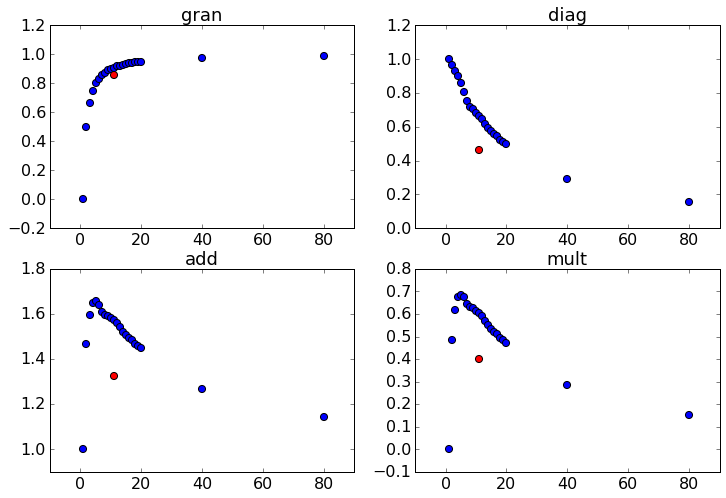

In [9]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
for i, val in enumerate(['gran','diag','add','mult']):
    ax = axes[i]
    ax.scatter(df.index[:-1], df[val][:-1], s = 50)
    ax.scatter(df.index[-1:], df[val][-1:], s=50, c='red')
    #ax.scatter(df.index[-1:], df[val][-1:], s=50, c='green')
    ax.set_title(val)

In [10]:
rem = re[0]
from numpy import linalg
linalg.det(rem)
#rem_inv = linalg.inv(rem)
#np.dot(df_evts['reco'], rem_inv)


0.0

# Inverting Response Matrix and Unfolding

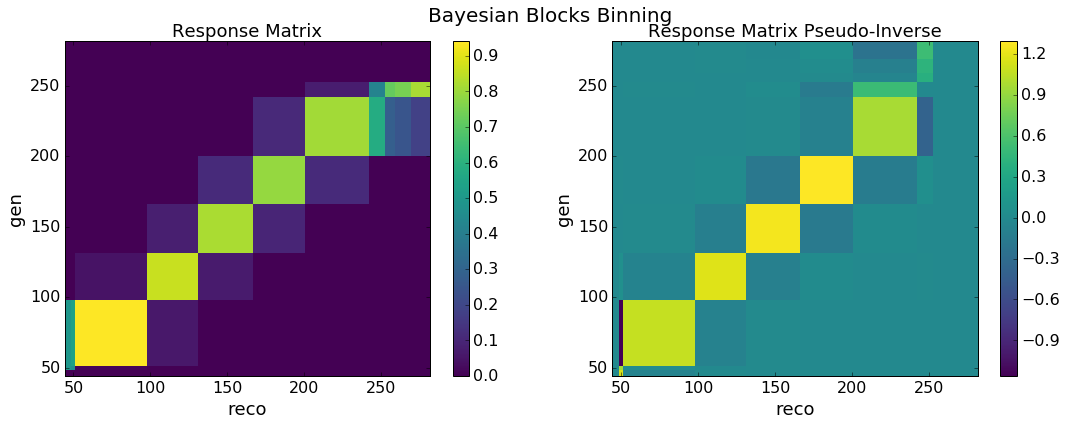

In [98]:
plt.rcParams['figure.figsize'] = (18,6)
re_bb = uf.calc_response_matrix(df_evts, bb_bin, xlims)
fig, axes = plt.subplots(1,2)
pc_re = axes[0].pcolor(re_bb[1], re_bb[2], re_bb[0].T)
axes[0].axis([re_bb[1].min(), re_bb[1].max(), re_bb[2].min(), re_bb[2].max()])
fig.colorbar(pc_re, ax=axes[0])
axes[0].set_title('Response Matrix')
axes[0].set_xlabel('reco')
axes[0].set_ylabel('gen')

pinv_bb = linalg.pinv(re_bb[0])
pc_inv = axes[1].pcolor(re_bb[1], re_bb[2], pinv_bb.T)
axes[1].axis([re_bb[1].min(), re_bb[1].max(), re_bb[2].min(), re_bb[2].max()])
fig.colorbar(pc_inv, ax=axes[1])
axes[1].set_title('Response Matrix Pseudo-Inverse')
axes[1].set_xlabel('reco')
axes[1].set_ylabel('gen')
fig.suptitle('Bayesian Blocks Binning')

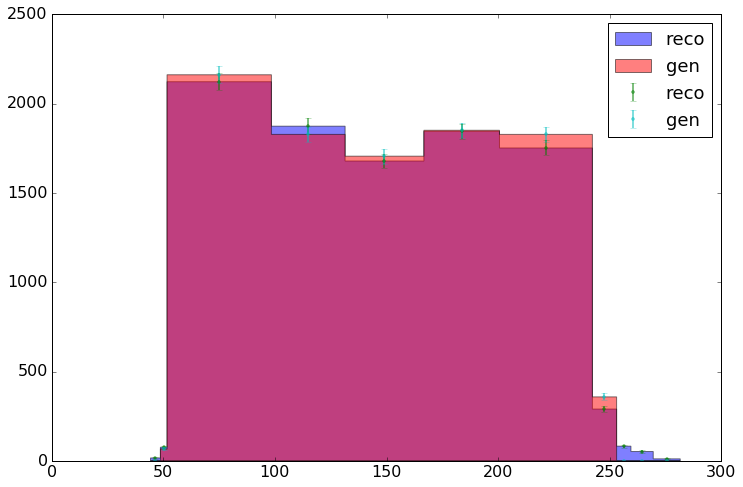

In [78]:
hist_out_bb = hist(df_evts['reco'], bb_bin, alpha=0.5, histtype='stepfilled', label='reco', )
hist(df_evts['gen'], bb_bin, alpha=0.5, histtype='stepfilled', label='gen', )
plt.legend()

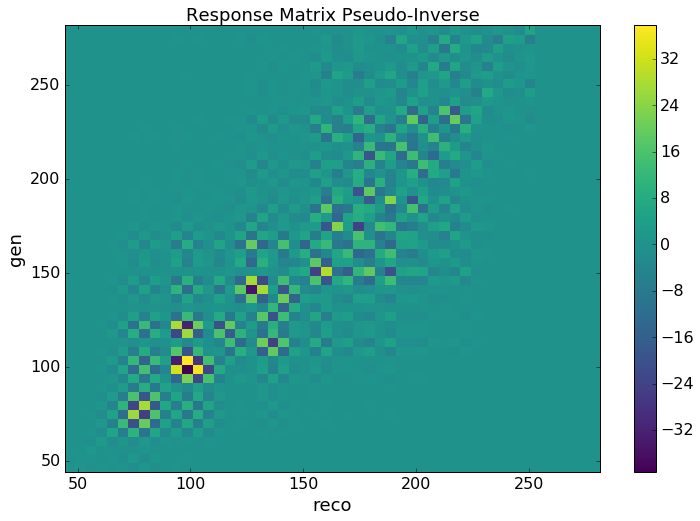

In [79]:
re_bb = uf.calc_response_matrix(df_evts, bb_bin, xlims)
pinv_bb = uf.plot_inv_rem(re)

[    0.          2952.05191731  2460.02662116  2610.0708467   2690.05378993
  3150.23810771  1785.93007473   293.1706224      0.             0.             0.        ]


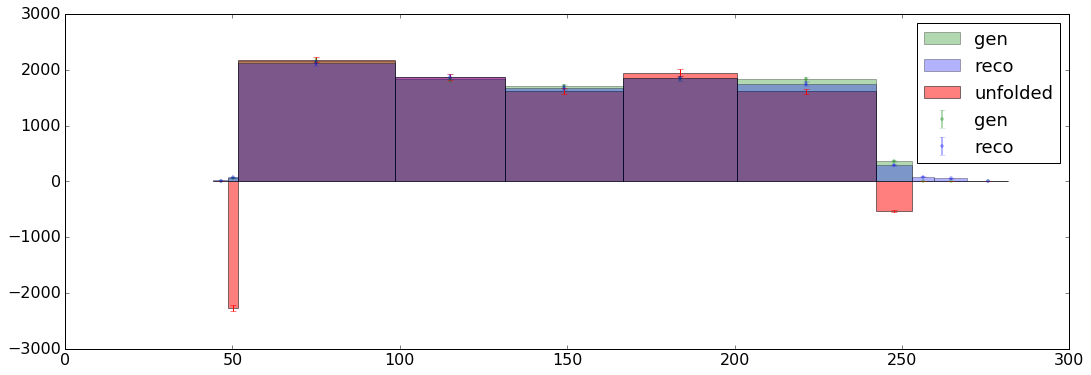

In [102]:
uf.unfold_and_plot(re_bb[0], hist_out[0], hist_out[1])
hist(df_evts.gen, hist_out[1], alpha = 0.3, color="green", label='gen', errorbars=True)
hist(df_evts.reco, hist_out[1], alpha = 0.3, color="blue", label='reco', errorbars=True)
plt.legend()


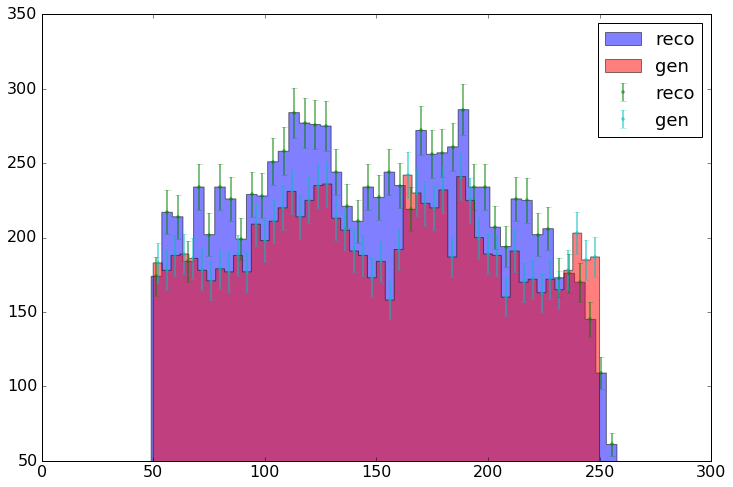

In [72]:
hist_out = hist(df_evts['reco'], 50, alpha=0.5, histtype='stepfilled', label='reco', )
hist(df_evts['gen'], 50, alpha=0.5, histtype='stepfilled', label='gen', )
plt.legend()

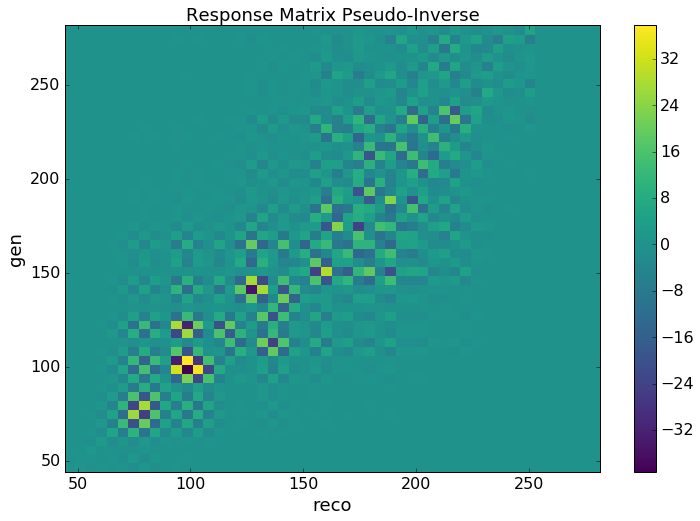

In [75]:
re = uf.calc_response_matrix(df_evts, 50, xlims)
pinv = uf.plot_inv_rem(re)

[  1.17636932e-25   8.84933735e+01   1.06468470e+03   3.51913765e+03
   2.99379298e+04   1.43764880e+05   6.14077755e+05   7.40547290e+05
   4.12405700e+05   5.18752216e+04   1.12849127e+06   1.59391420e+06
   9.51453620e+05   2.53956584e+05   2.74366155e+05   2.84895568e+05
   3.03514877e+05   7.22853757e+05   7.72394136e+05   5.04468113e+05
   5.66099969e+05   1.40256032e+05   9.97316086e+04   4.63722946e+05
   7.05241444e+05   3.94633303e+05   2.34890297e+05   6.28177477e+05
   5.97930759e+05   2.42077108e+05   5.85813625e+05   1.85462388e+05
   4.13534237e+05   2.07092688e+05   1.43008929e+05   1.59563850e+05
   2.16269578e+05   5.86395862e+04   2.46267485e+04   1.41459328e+04
   1.84002612e+03   2.53910149e+03   4.88188242e+02   5.13126015e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


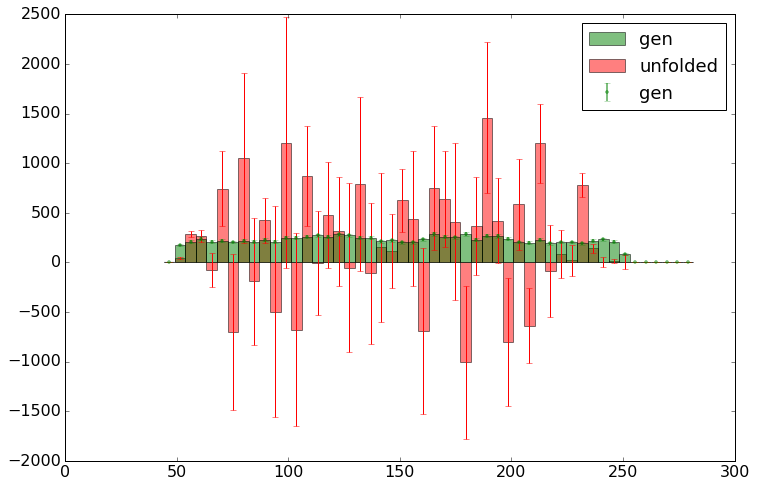

In [76]:
uf.unfold_and_plot(re[0], hist_out[0], hist_out[1])
hist(df_evts.gen, hist_out[1], alpha = 0.5, color="green", label='gen', errorbars=True)
plt.legend()
